<a href="https://colab.research.google.com/github/dyou-wbg/meta_processing/blob/main/clean_LevensteinDistance__AllTitles.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd
# as of today
import datetime as dt
dt.date.today()
import os
import pandas as pd
from google.colab import drive
import csv
import os


Mounted at /content/drive


In [5]:
df = pd.read_csv('/content/drive/My Drive/All_titles.csv')
df.rename(columns={'0': 'title'}, inplace=True)
df.drop(columns=['Unnamed: 0'], inplace=True)

In [ ]:
df.head()

,title
0,Economic Education in Our Schools: A Renewed M...
1,Can Germany Contain Russia Safely?
2,Assessing the Impact of Sarbanes-Oxley Act on ...
3,Childhood Educational Disruption and Later Lif...
4,The Exclusion of Liability for Negligence


In [6]:
df_sample = df.sample(n=1000)
df_sample_2 = df.sample(n=200)
df_sample.to_csv('/content/drive/MyDrive/sample1K_titles.csv', index=False)

In [ ]:
from itertools import combinations


def levenshtein_distance(str1, str2):
  m = len(str1) + 1
  n = len(str2) + 1
  dp = [[0 for _ in range(n)] for _ in range(m)]

  for i in range(m):
    dp[i][0] = i

  for j in range(n):
    dp[0][j] = j

  for i in range(1, m):
    for j in range(1, n):
      if str1[i - 1] == str2[j - 1]:
        cost = 0
      else:
        cost = 1
      dp[i][j] = min(dp[i - 1][j] + 1,  # insertion
                     dp[i][j - 1] + 1,  # deletion
                     dp[i - 1][j - 1] + cost)  # substitution

  return dp[m - 1][n - 1]





titles=df_sample_2['title'].astype(str).tolist()



distances = []
for title1, title2 in combinations(titles, 2):
  dist = levenshtein_distance(title1, title2)
  distances.append((title1, title2, dist))
print("Sample Levenshtein distances:")
for title1, title2, dist in distances[:5]:  #just show first 5
  print(f"{title1} - {title2}: {dist}")


def check_duplicates(titles, threshold):
  duplicates = set()
  for i in range(len(titles)):
    for j in range(i + 1, len(titles)):
      dist = levenshtein_distance(titles[i], titles[j])
      if dist <= threshold:
        # Add both titles to the set (avoiding duplicates within the set)
        duplicates.update([titles[i], titles[j]])
  return list(duplicates)



threshold = 2

duplicates = check_duplicates(titles, threshold)

if duplicates:
  print("------Duplicate titles found:------")
  for title in duplicates:
    print(title)
else:
  print("No duplicate titles found within the Levenshtein distance threshold of", threshold)

Sample Levenshtein distances:
Optimal gelaufen, einfach zufrieden oder unüberlegt gehandelt? Zur Theorie (un)eingeschränkt rationalen Entscheidens - What Do Emissions Markets Deliver and to Whom? Evidence from Southern California's NOx Trading Program: 97
Optimal gelaufen, einfach zufrieden oder unüberlegt gehandelt? Zur Theorie (un)eingeschränkt rationalen Entscheidens - Empirical Characterization of Call Money Market in India: 91
Optimal gelaufen, einfach zufrieden oder unüberlegt gehandelt? Zur Theorie (un)eingeschränkt rationalen Entscheidens - Er der et europæisk hukou system i støbeskeen: 94
Optimal gelaufen, einfach zufrieden oder unüberlegt gehandelt? Zur Theorie (un)eingeschränkt rationalen Entscheidens - Choosing Remedies for the Common Pool : The Case of California ’ s Groundwater Management: 92
Optimal gelaufen, einfach zufrieden oder unüberlegt gehandelt? Zur Theorie (un)eingeschränkt rationalen Entscheidens - Bayesian Inference for Generalized Additive Regression based on

# simple cluster

In [18]:
from itertools import combinations


def levenshtein_distance(str1, str2):
  m = len(str1) + 1
  n = len(str2) + 1
  dp = [[0 for _ in range(n)] for _ in range(m)]

  for i in range(m):
    dp[i][0] = i

  for j in range(n):
    dp[0][j] = j

  for i in range(1, m):
    for j in range(1, n):
      if str1[i - 1] == str2[j - 1]:
        cost = 0
      else:
        cost = 1
      dp[i][j] = min(dp[i - 1][j] + 1,  # insertion
                     dp[i][j - 1] + 1,  # deletion
                     dp[i - 1][j - 1] + cost)  # substitution

  return dp[m - 1][n - 1]

titles=df_sample_2['title'].astype(str).tolist()


distances = []
for title1, title2 in combinations(titles, 2):
  dist = levenshtein_distance(title1, title2)
  distances.append((title1, title2, dist))
print("Sample Levenshtein distances:")
for title1, title2, dist in distances[:5]:  #just show first 5
  print(f"{title1} - {title2}: {dist}")

Sample Levenshtein distances:
Did Spillovers From Europe Indeed Contribute to the 2010 U.S. Flash Crash? - Review: Miscellaneous: Gendering World Politics: 62
Did Spillovers From Europe Indeed Contribute to the 2010 U.S. Flash Crash? - The physics of pandemics with application to COVID19: 58
Did Spillovers From Europe Indeed Contribute to the 2010 U.S. Flash Crash? - IT in Emerging Markets: 63
Did Spillovers From Europe Indeed Contribute to the 2010 U.S. Flash Crash? - 11. Tabi.pmd: 70
Did Spillovers From Europe Indeed Contribute to the 2010 U.S. Flash Crash? - Work modification as a treatment for low-back pain: 59


In [19]:


min_dist = min(dist for title1, title2, dist in distances)
max_dist = max(dist for title1, title2, dist in distances)

print(f"Minimum Levenshtein distance: {min_dist}")
print(f"Maximum Levenshtein distance: {max_dist}")


Minimum Levenshtein distance: 11
Maximum Levenshtein distance: 222


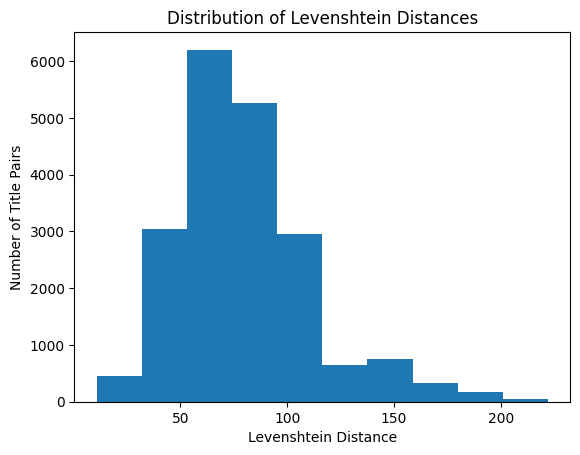

In [20]:


import matplotlib.pyplot as plt

distances = [dist for title1, title2, dist in distances]

# Create a histogram with 10 bins
plt.hist(distances, bins=10)

# Add labels and title
plt.xlabel("Levenshtein Distance")
plt.ylabel("Number of Title Pairs")
plt.title("Distribution of Levenshtein Distances")

# Show the plot
plt.show()



Distance range with the most titles: 53.20 - 74.30


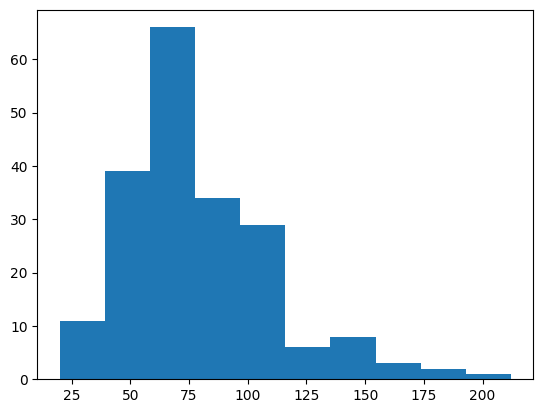

In [32]:
max_count = 0
max_bin = None
for i, count in enumerate(plt.hist(distances, bins=10)[0]):
  if count > max_count:
    max_count = count
    max_bin = i

# Calculate the corresponding distance range for the bin
bin_width = (max_dist - min_dist) / 10
min_dist_bin = min_dist + max_bin * bin_width
max_dist_bin = min_dist_bin + bin_width

# Print the distance range with the most titles
print(f"Distance range with the most titles: {min_dist_bin:.2f} - {max_dist_bin:.2f}")


In [29]:
!pip install Levenshtein
import Levenshtein

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 177.4/177.4 kB 4.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 18.3 MB/s eta 0:00:00


In [30]:
distances = [Levenshtein.distance(title1, title2) for title1, title2 in zip(titles, titles[1:])]

In [34]:
from itertools import combinations


def levenshtein_distance(str1, str2):
  m = len(str1) + 1
  n = len(str2) + 1
  dp = [[0 for _ in range(n)] for _ in range(m)]

  for i in range(m):
    dp[i][0] = i

  for j in range(n):
    dp[0][j] = j

  for i in range(1, m):
    for j in range(1, n):
      if str1[i - 1] == str2[j - 1]:
        cost = 0
      else:
        cost = 1
      dp[i][j] = min(dp[i - 1][j] + 1,  # insertion
                     dp[i][j - 1] + 1,  # deletion
                     dp[i - 1][j - 1] + cost)  # substitution

  return dp[m - 1][n - 1]

titles=df_sample_2['title'].astype(str).tolist()


distances = []
for title1, title2 in combinations(titles, 2):
  dist = levenshtein_distance(title1, title2)
  distances.append((title1, title2, dist))
print("Sample Levenshtein distances:")
for title1, title2, dist in distances[:5]:  #just show first 5
  print(f"{title1} - {title2}: {dist}")

def check_duplicates_range(titles, min_dist, max_dist):
  duplicates = set()
  for i in range(len(titles)):
    for j in range(i + 1, len(titles)):
      dist = levenshtein_distance(titles[i], titles[j])
      if min_dist <= dist <= max_dist:
        # Add both titles to the set (avoiding duplicates within the set)
        duplicates.update([titles[i], titles[j]])
  return list(duplicates)


min_dist = 50
max_dist = 75

import time

start = time.time()
duplicates = check_duplicates_range(titles, min_dist, max_dist)

if duplicates:
  print("------Duplicate titles found within the Levenshtein distance range of", min_dist, "and", max_dist, ":------")
  for title in duplicates:
    print(title)
else:
  print("No duplicate titles found within the Levenshtein distance range of", min_dist, "and", max_dist)

end = time.time()
print(f"--------------------------")
print(f"Execution time: {end - start:.2f} seconds")


Sample Levenshtein distances:
Did Spillovers From Europe Indeed Contribute to the 2010 U.S. Flash Crash? - Review: Miscellaneous: Gendering World Politics: 62
Did Spillovers From Europe Indeed Contribute to the 2010 U.S. Flash Crash? - The physics of pandemics with application to COVID19: 58
Did Spillovers From Europe Indeed Contribute to the 2010 U.S. Flash Crash? - IT in Emerging Markets: 63
Did Spillovers From Europe Indeed Contribute to the 2010 U.S. Flash Crash? - 11. Tabi.pmd: 70
Did Spillovers From Europe Indeed Contribute to the 2010 U.S. Flash Crash? - Work modification as a treatment for low-back pain: 59
------Duplicate titles found within the Levenshtein distance range of 50 and 75 :------
GUIDANCE ON THE OPERATION OF THE SUBSIDY CONTROL FUNCTIONS OF THE SUBSIDY ADVICE UNIT
The impact of eastern European immigration to UK trade
The Impact of Trade and Transport Services on the Environment in Africa
Do financial advisor commissions distort client choice?
LibGuides: Economics

# with 1K sample

In [ ]:
from itertools import combinations


def levenshtein_distance(str1, str2):
  m = len(str1) + 1
  n = len(str2) + 1
  dp = [[0 for _ in range(n)] for _ in range(m)]

  for i in range(m):
    dp[i][0] = i

  for j in range(n):
    dp[0][j] = j

  for i in range(1, m):
    for j in range(1, n):
      if str1[i - 1] == str2[j - 1]:
        cost = 0
      else:
        cost = 1
      dp[i][j] = min(dp[i - 1][j] + 1,  # insertion
                     dp[i][j - 1] + 1,  # deletion
                     dp[i - 1][j - 1] + cost)  # substitution

  return dp[m - 1][n - 1]

titles=df_sample['title'].astype(str).tolist()


distances = []
for title1, title2 in combinations(titles, 2):
  dist = levenshtein_distance(title1, title2)
  distances.append((title1, title2, dist))
print("Sample Levenshtein distances:")
for title1, title2, dist in distances[:5]:  #just show first 5
  print(f"{title1} - {title2}: {dist}")

def check_duplicates_range(titles, min_dist, max_dist):
  duplicates = set()
  for i in range(len(titles)):
    for j in range(i + 1, len(titles)):
      dist = levenshtein_distance(titles[i], titles[j])
      if min_dist <= dist <= max_dist:
        # Add both titles to the set (avoiding duplicates within the set)
        duplicates.update([titles[i], titles[j]])
  return list(duplicates)


min_dist = 50
max_dist = 75

import time

start = time.time()
duplicates = check_duplicates_range(titles, min_dist, max_dist)

if duplicates:
  print("------Duplicate titles found within the Levenshtein distance range of", min_dist, "and", max_dist, ":------")
  for title in duplicates:
    print(title)
else:
  print("No duplicate titles found within the Levenshtein distance range of", min_dist, "and", max_dist)
  end = time.time()
print(f"--------------------------")
print(f"Execution time: {end - start:.2f} seconds")
